Desafio 20: Análise de Doações para ONGs

📂 Dataset: Registro de doações recebidas por diferentes ONGs em várias cidades.
Colunas: ONG, Cidade, Valor_Doacao, Forma_Pagamento, Tipo_Doador, Data_Doacao

🎯 Atividades:

Qual é a ONG que recebeu o maior valor total em doações?

Qual cidade teve o maior número de doações?

Qual é a média de valor doado por empresas?

Qual a forma de pagamento mais comum entre pessoas físicas?

Crie um gráfico de linha mostrando a evolução do valor total de doações ao longo do tempo (por data).

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#testando dataset
df = pd.read_csv("dia_20_doacoes_ongs.csv")
df.head()

,ONG,Cidade,Valor_Doacao,Forma_Pagamento,Tipo_Doador,Data_Doacao
0,Ajuda Animal,Porto Alegre,2352.47,Transferência,Pessoa Física,2024-01-01
1,Ajuda Animal,Recife,4691.83,Cartão de Crédito,Pessoa Física,2024-01-02
2,Lar dos Idosos,São Paulo,388.07,Cartão de Crédito,Pessoa Física,2024-01-03
3,Lar dos Idosos,São Paulo,4802.02,Transferência,Empresa,2024-01-04
4,Lar dos Idosos,São Paulo,4561.40,Transferência,Empresa,2024-01-05


In [23]:
#Qual é a ONG que recebeu o maior valor total em doações?
ongDoacaoTotal = df.groupby("ONG")["Valor_Doacao"].sum().sort_values(ascending=False)
print(f"A ONG que recebeu o maior valor total em doações foi: {ongDoacaoTotal.idxmax()}, com R$ {ongDoacaoTotal.max():.2f}")

A ONG que recebeu o maior valor total em doações foi: Ajuda Animal, com R$ 78634.43


In [24]:
#Qual cidade teve o maior número de doações?
cidadeDoacaoTotal = df["Cidade"].value_counts()
print(f"A cidade com o maior número de doações é: {cidadeDoacaoTotal.idxmax()}")

A cidade com o maior número de doações é: Porto Alegre


In [25]:
#Qual é a média de valor doado por empresas?
mediaDoacaoEmpresa = df[df["Tipo_Doador"] == "Empresa"]["Valor_Doacao"].mean()
print(f"Média de valor doado por empresas: R$ {mediaDoacaoEmpresa:.2f}")

Média de valor doado por empresas: R$ 2650.90


In [26]:
#Qual a forma de pagamento mais comum entre pessoas físicas?
formaPagamentoPF = df[df["Tipo_Doador"] == "Pessoa Física"]["Forma_Pagamento"].value_counts()
print(f"A forma de pagamento mais comum entre pessoas físicas é: {formaPagamentoPF.idxmax()}")

A forma de pagamento mais comum entre pessoas físicas é: Boleto


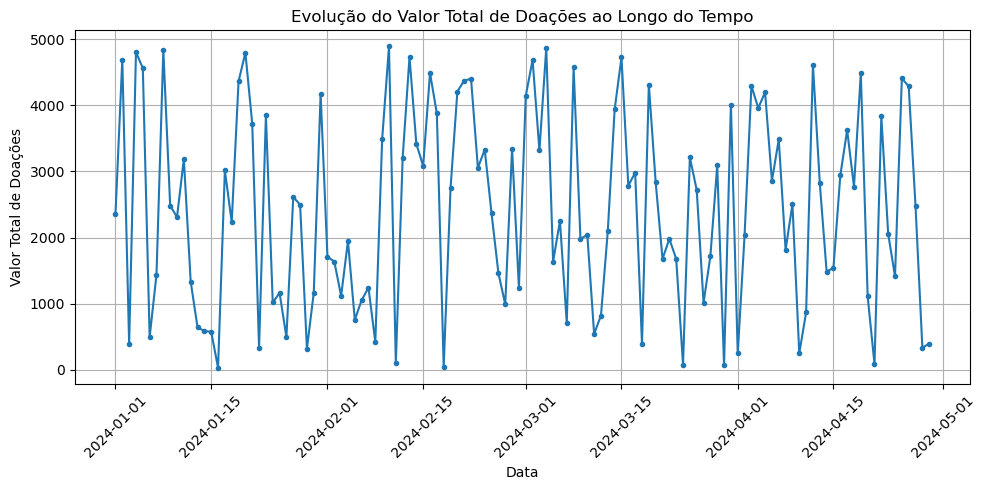

In [34]:
#Crie um gráfico de linha mostrando a evolução do valor total de doações ao longo do tempo (por data).
df["Data_Doacao"] = pd.to_datetime(df["Data_Doacao"])
evolucaoDoacao =  df.groupby("Data_Doacao")["Valor_Doacao"].sum()

plt.figure(figsize=(10, 5))
plt.plot(evolucaoDoacao.index, evolucaoDoacao.values, marker='.', linestyle='-')
plt.title("Evolução do Valor Total de Doações ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Valor Total de Doações")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()